# Question 1
Picture one is a picture of a sign and picture two is a picture of my friend holding up a notebook.

(<AxesSubplot:title={'center':'Book'}>,
 Text(0.5, 1.0, 'Book'),
 ([], []),
 ([], []))

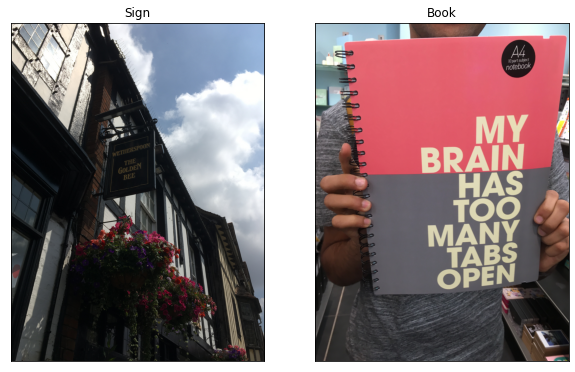

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import cvui
%matplotlib inline

sign = cv2.imread('sign.JPG')
book = cv2.imread('book.JPG')

rgb_sign = cv2.cvtColor(sign, cv2.COLOR_BGR2RGB)
rgb_book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(rgb_sign), plt.title("Sign"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(rgb_book), plt.title("Book"), plt.xticks([]), plt.yticks([])

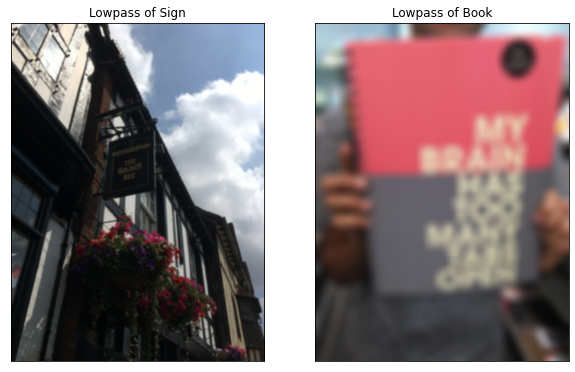

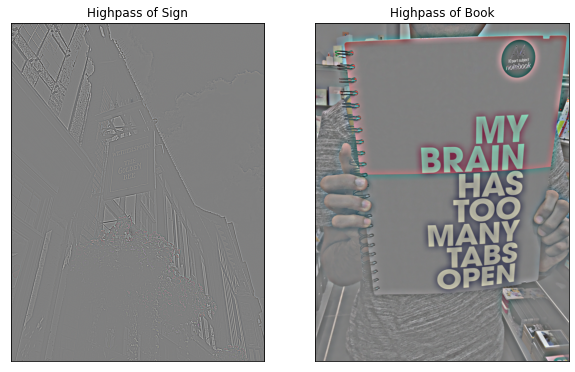

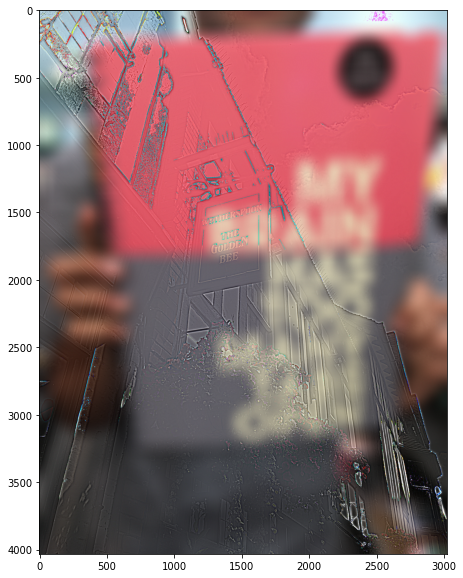

In [2]:
sign_low = cv2.GaussianBlur(rgb_sign, (27,27), 9)
book_low = cv2.GaussianBlur(rgb_book, (165,165), 55)
sign_high = rgb_sign - sign_low
book_high = rgb_book - book_low

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(sign_low), plt.title("Lowpass of Sign"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_low), plt.title("Lowpass of Book"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(sign_high+128), plt.title("Highpass of Sign"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_high+128), plt.title("Highpass of Book"), plt.xticks([]), plt.yticks([])

combined = book_low + sign_high

plt.figure(figsize=(10,10))
plt.imshow(combined)

# Question 2

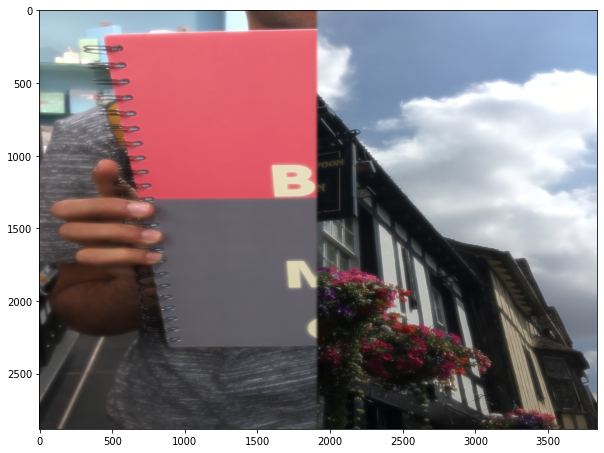

In [2]:
sign = cv2.imread('sign.JPG')
book = cv2.imread('book.JPG')

dimension = (3840,2880)
book32 = cv2.resize(book, dimension, interpolation = cv2.INTER_AREA)
sign32 = cv2.resize(sign, dimension, interpolation = cv2.INTER_AREA)

gaussBook = book32.copy()
gaussPyBook = [gaussBook]

for i in range(5):
    gaussBook = cv2.pyrDown(gaussBook)
    gaussPyBook.append(gaussBook)
    
gaussSign = sign32.copy()
gaussPySign = [gaussSign]

for i in range(5):
    gaussSign = cv2.pyrDown(gaussSign)
    gaussPySign.append(gaussSign)

laplaceBook = [gaussPyBook[4]]
for i in range (4,0,-1):
    gaussExtendB = cv2.pyrUp(gaussPyBook[i])
    lB = cv2.subtract(gaussPyBook[i-1], gaussExtendB)
    laplaceBook.append(lB)
    
laplaceSign = [gaussPySign[4]]
for i in range (4,0,-1):
    gaussExtendS = cv2.pyrUp(gaussPySign[i])
    lS = cv2.subtract(gaussPySign[i-1], gaussExtendS)
    laplaceSign.append(lS)

laplacePyramid = []

for bo, si in zip(laplaceBook, laplaceSign):
    rows, cols, dpt = bo.shape
    ls = np.hstack((bo[:,0:int(cols/2)], si[:,int(cols/2):]))
    laplacePyramid.append(ls)

reconstruct = laplacePyramid[0]

for i in range(1,5):
    reconstruct = cv2.pyrUp(reconstruct)
    reconstruct = cv2.add(reconstruct, laplacePyramid[i])
    

reconstructRGB = cv2.cvtColor(reconstruct, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(reconstructRGB)
    

# Question 2 - Bonus Credit

In [3]:

window_name = "joined images"
n = [4]
bar_xloc = 10
bar_yloc = 10
bar_length = 100
min_n = 0
max_n = 5

sign = cv2.imread('sign.JPG')
book = cv2.imread('book.JPG')

dimension = (3840,2880)
book32 = cv2.resize(book, dimension, interpolation = cv2.INTER_AREA)
sign32 = cv2.resize(sign, dimension, interpolation = cv2.INTER_AREA)

gaussBook = book32.copy()
gaussPyBook = [gaussBook]

for i in range(5):
    gaussBook = cv2.pyrDown(gaussBook)
    gaussPyBook.append(gaussBook)
    
gaussSign = sign32.copy()
gaussPySign = [gaussSign]

for i in range(5):
    gaussSign = cv2.pyrDown(gaussSign)
    gaussPySign.append(gaussSign)

laplaceBook = [gaussPyBook[4]]
for i in range (4,0,-1):
    gaussExtendB = cv2.pyrUp(gaussPyBook[i])
    lB = cv2.subtract(gaussPyBook[i-1], gaussExtendB)
    laplaceBook.append(lB)
    
laplaceSign = [gaussPySign[4]]
for i in range (4,0,-1):
    gaussExtendS = cv2.pyrUp(gaussPySign[i])
    lS = cv2.subtract(gaussPySign[i-1], gaussExtendS)
    laplaceSign.append(lS)

laplacePyramid = []

for bo, si in zip(laplaceBook, laplaceSign):
    rows, cols, dpt = bo.shape
    ls = np.hstack((bo[:,0:int(cols/2)], si[:,int(cols/2):]))
    laplacePyramid.append(ls)

reconstruct = laplacePyramid[0]
for i in range(1,5):
    reconstruct = cv2.pyrUp(reconstruct)
    reconstruct = cv2.add(reconstruct, laplacePyramid[i])
    
reconstructSmall = cv2.resize(reconstruct, (960,720))
cvui.init(window_name)
while True:
    trackbar = cvui.trackbar(reconstructSmall, bar_xloc, bar_yloc, bar_length, n, min_n, max_n)
    cv2.imshow(window_name, reconstructSmall)
    if trackbar:
        for i in range(1,n[0]):
            reconstruct = cv2.pyrUp(reconstruct)
            reconstruct = cv2.add(reconstruct, laplacePyramid[i])
        reconstructSmall = cv2.resize(reconstruct, (960,720))
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # btw, you need to click the screen first. And then 
                                     # press q to quit
        break
cv2.destroyAllWindows()

TypeError: 'float' object cannot be interpreted as an integer